# From neural tunings to population manifolds


**Author**:

* Author: steeve.laquitaine@epfl.ch; laquitainesteeve@gmail.com
* Adapted from notebooks by Steffen Schneider, Jin H Lee, Mackenzie Mathis.  
* Duration: **20 seconds**

**Learning outcomes**:

* Know <u>what a manifold is</u> and what it is not.
* Know what is an <u>entangled manifold</u> and how to <u>disentangle</u> it.
* Know how to <u>link individual neural tuning functions</u> to <u> population manifolds</u> in the absence of noise (simplification).
* Recognize <u>different types of neural codes</u> ("splitter", "lumper")

**Python prerequisites**:

* Installing and importing libraries
* Functions

**Readings**:

* Kriegeskorte, N., & Wei, X. X. (2021). Neural tuning and representational geometry. Nature Reviews Neuroscience, 22(11), 703-718.

# (3s) Setup

In [ ]:
# @title (1s) Install libraries
!pip install -q scipy         # software for circular statistics
!pip install ipython-autotime # software to track notebook cell execution time
%load_ext autotime

In [ ]:
# @title (1s) Import libraries

# LIBRARIES
from scipy.stats import vonmises
import numpy as np
from matplotlib import pyplot as plt

# PLOT PARAMETERS
FIGSIZE = (8,8)

time: 887 µs (started: 2024-03-26 09:53:05 +00:00)


In [ ]:
# @title (1s) Define custom functions

def plot_linear_and_polar_tuning(parameters:dict):
  """Plot an example tuning function in the linear and polar space for a single neuron
  """

  # TUNING FUNCTIONS ------------

  # Simulate orientation features (degrees)
  orientations = np.linspace(-180, 180, 181)  # 181 values from -180 to 180 degrees


  # Simulate tuning functions
  # neuron 1
  n1_tuning = vonmises.pdf(parameters["n1_pref_orientation"] * np.pi / 180, parameters["n1_strength"], orientations * np.pi / 180)

  # Plot on linear space
  fig = plt.figure(figsize=FIGSIZE)
  left = fig.add_subplot(121)

  # neuron 1
  left.plot(orientations, n1_tuning, color="r");

  # legend
  left.set_title("Tuning functions")  # square axis
  left.set_box_aspect(1)  # square axis
  left.set_xlabel("Orientations");
  left.set_ylabel("Firing rate");
  left.spines[["top","right"]].set_visible(False)


  # Plot on polar space
  right = fig.add_subplot(122, projection='polar')
  right.plot(orientations * np.pi / 180, n1_tuning, color="r");


def plot_tuning_and_manifold(parameters:dict):
  """Plot tuning functions for two neurons and their neural
  population response manifold
  """

  # TUNING FUNCTIONS ------------

  # Simulate orientation features (degrees)
  orientations = np.linspace(-180, 180, 181)  # 181 values from -180 to 180 degrees


  # Simulate tuning functions
  # neuron 1
  n1_tuning = vonmises.pdf(parameters["n1_pref_orientation"] * np.pi / 180, parameters["n1_strength"], orientations * np.pi / 180)
  # neuron 2
  n2_tuning = vonmises.pdf(parameters["n2_pref_orientation"] * np.pi / 180, parameters["n2_strength"], orientations * np.pi / 180)


  # Plot
  fig = plt.figure(figsize=FIGSIZE)
  left = fig.add_subplot(121)

  # neuron 1
  left.plot(orientations, n1_tuning, color=(.7,.7,.7));

  # neuron 2
  left.plot(orientations, n2_tuning, color="black");

  # legend
  left.set_title("Tuning functions")  # square axis
  left.set_box_aspect(1)  # square axis
  left.set_xlabel("Orientations");
  left.set_ylabel("Firing rate");
  left.spines[["top","right"]].set_visible(False)



  # MANIFOLD ------------

  right = fig.add_subplot(122)

  # Plot
  right.plot(n1_tuning, n2_tuning, linestyle=":");

  # legend
  right.set_title("Neural manifold")  # square axis
  right.set_box_aspect(1)  # square axis
  right.set_xlabel("Neuron 1");
  right.set_ylabel("Neuron 2");
  right.spines[["top","right"]].set_visible(False)

  plt.tight_layout()


def plot_tuning_and_not_manifold(parameters:dict):
  """Plot tuning functions for two neurons. One neuron has bimodal tuning.
  Plot their neural population response manifold.
  """

  # TUNING FUNCTIONS ------------

  # Simulate orientation features (degrees)
  orientations = np.linspace(-180, 180, 181)  # 181 values from -180 to 180 degrees


  # Simulate tuning functions
  # neuron 1 (mixture of two von mises)
  comp1 = vonmises.pdf(parameters["n1_pref_orientation_1"] * np.pi / 180, parameters["n1_strength_1"], orientations * np.pi / 180)
  comp2 = vonmises.pdf(parameters["n1_pref_orientation_2"] * np.pi / 180, parameters["n1_strength_2"], orientations * np.pi / 180)
  n1_tuning = parameters["mixture"]*comp1 + (1-parameters["mixture"])*comp2

  # neuron 2
  n2_tuning = vonmises.pdf(parameters["n2_pref_orientation"] * np.pi / 180, parameters["n2_strength"], orientations * np.pi / 180)


  # Plot
  fig = plt.figure(figsize=FIGSIZE)
  left = fig.add_subplot(121)

  # neuron 1
  left.plot(orientations, n1_tuning, color=(.7,.7,.7));

  # neuron 2
  left.plot(orientations, n2_tuning, color="black");

  # legend
  left.set_title("Tuning functions")  # square axis
  left.set_box_aspect(1)  # square axis
  left.set_xlabel("Orientations");
  left.set_ylabel("Firing rate");
  left.spines[["top","right"]].set_visible(False)



  # MANIFOLD ------------
  left = fig.add_subplot(122)

  # Plot
  left.plot(n1_tuning, n2_tuning, linestyle=":");

  # legend
  left.set_title("Not a neural manifold")  # square axis
  left.set_box_aspect(1)  # square axis
  left.set_xlabel("Neuron 1");
  left.set_ylabel("Neuron 2");
  left.spines[["top","right"]].set_visible(False)

  plt.tight_layout()


def plot_tuning_and_disentangled_hypersurface(parameters:dict):
  """Plot tuning functions for two neurons. One neuron has bimodal tuning.
  Plot their neural population response manifold.
  """

  # TUNING FUNCTIONS ------------

  # Simulate orientation features (degrees)
  orientations = np.linspace(-180, 180, 181)  # 181 values from -180 to 180 degrees


  # Simulate tuning functions
  # neuron 1 (mixture of two von mises)
  comp1 = vonmises.pdf(parameters["n1_pref_orientation_1"] * np.pi / 180, parameters["n1_strength_1"], orientations * np.pi / 180)
  comp2 = vonmises.pdf(parameters["n1_pref_orientation_2"] * np.pi / 180, parameters["n1_strength_2"], orientations * np.pi / 180)
  n1_tuning = parameters["mixture"]*comp1 + (1-parameters["mixture"])*comp2

  # neuron 2
  n2_tuning = vonmises.pdf(parameters["n2_pref_orientation"] * np.pi / 180, parameters["n2_strength"], orientations * np.pi / 180)

  # neuron 3
  n3_tuning = vonmises.pdf(parameters["n3_pref_orientation"] * np.pi / 180, parameters["n3_strength"], orientations * np.pi / 180)


  # Plot
  fig = plt.figure(figsize=FIGSIZE)
  left = fig.add_subplot(121)

  left.plot(orientations, n1_tuning, color=(.7,.7,.7)); # neuron 1
  left.plot(orientations, n2_tuning, color="black");    # neuron 2
  left.plot(orientations, n3_tuning, color=(1,0,0));    # neuron 3

  # legend
  left.set_title("Tuning functions")
  left.set_box_aspect(1)  # square axis
  left.set_xlabel("Orientations");
  left.set_ylabel("Firing rate");
  left.spines[["top","right"]].set_visible(False)


  # MANIFOLD ------------

  # Plot
  left = fig.add_subplot(122, projection='3d')
  left.view_init(20, 45, 0) # elev, azim, roll
  left.plot(n1_tuning, n2_tuning, n3_tuning, linestyle=":");

  # legend
  left.set_title("Not a neural manifold")
  left.set_xlabel("Neuron 1");
  left.set_ylabel("Neuron 2");
  left.set_zlabel("Neuron 3");
  left.spines[["top","right"]].set_visible(False)
  left.xaxis.pane.fill = False
  left.yaxis.pane.fill = False
  left.zaxis.pane.fill = False
  left.set_box_aspect((1,1,1))
  plt.tight_layout()


def plot_3_neurons_tunings_and_manifold(parameters:dict):
  """Plot tuning functions for two neurons. One neuron has bimodal tuning.
  Plot their neural population response manifold.
  """

  # TUNING FUNCTIONS ------------

  # Simulate orientation features (degrees)
  orientations = np.linspace(-180, 180, 181)  # 181 values from -180 to 180 degrees

  # Simulate tuning functions
  # neuron 1,2 and 3
  n1_tuning = vonmises.pdf(parameters["n1_pref_orientation"] * np.pi / 180, parameters["n1_strength"], orientations * np.pi / 180)
  n2_tuning = vonmises.pdf(parameters["n2_pref_orientation"] * np.pi / 180, parameters["n2_strength"], orientations * np.pi / 180)
  n3_tuning = vonmises.pdf(parameters["n3_pref_orientation"] * np.pi / 180, parameters["n3_strength"], orientations * np.pi / 180)

  # Plot
  fig = plt.figure(figsize=FIGSIZE)
  left = fig.add_subplot(121)

  left.plot(orientations, n1_tuning, color=(.7,.7,.7)); # neuron 1
  left.plot(orientations, n2_tuning, color="black");    # neuron 2
  left.plot(orientations, n3_tuning, color=(1,0,0));    # neuron 3

  # legend
  left.set_title("Tuning functions")  # square axis
  left.set_box_aspect(1)  # square axis
  left.set_xlabel("Orientations");
  left.set_ylabel("Firing rate");
  left.spines[["top","right"]].set_visible(False)



  # MANIFOLD ------------

  # Plot
  right = fig.add_subplot(122, projection='3d')
  right.view_init(20, 45, 0) # elev, azim, roll
  right.plot(n1_tuning, n2_tuning, n3_tuning, linestyle=":");

  # legend
  right.set_title("Not a neural manifold")  # square axis
  right.set_xlabel("Neuron 1");
  right.set_ylabel("Neuron 2");
  right.set_zlabel("Neuron 3");
  right.spines[["top","right"]].set_visible(False)
  right.xaxis.pane.fill = False
  right.yaxis.pane.fill = False
  right.zaxis.pane.fill = False
  right.set_box_aspect((1,1,1))

  fig.tight_layout(pad=4)


time: 3.74 ms (started: 2024-03-26 09:53:09 +00:00)


# (1s) **The tuning function**

* A view on the linear (left) and circular space (right)


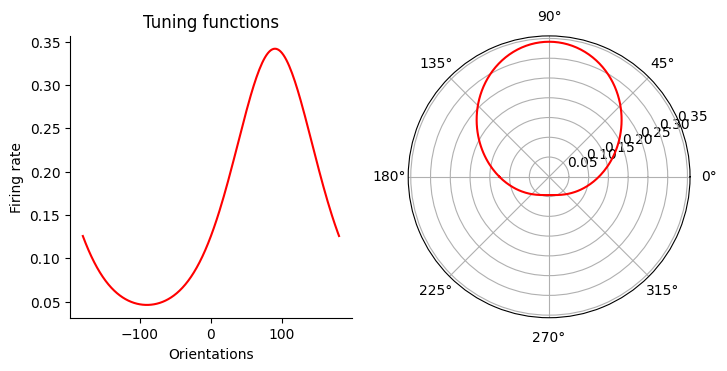

time: 683 ms (started: 2024-03-26 09:53:11 +00:00)


In [ ]:
# set parameters
parameters = {

    # neuron 1
    "n1_pref_orientation": 90,  # mean of the tuning function (preferred orientation)
    "n1_strength": 1,           # width of the tuning function (concentration)

  }

# plot
plot_linear_and_polar_tuning(parameters)

# (3s) **Tuning phases and manifold**

## (1s) Case 1: the 90 deg offset

*  The phases of the tuning curves are **offset by 90 degrees** (left).

* Population manifold is plotted on the right.

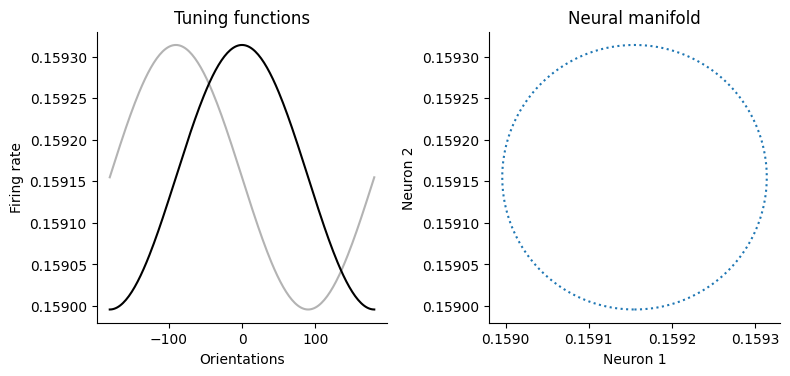

time: 680 ms (started: 2024-03-26 09:53:49 +00:00)


In [ ]:
# neuron 1
parameters = {

    # neuron 1
    "n1_pref_orientation": -90,  # mean of the tuning function (concentration)
    "n1_strength": 0.001,        # width of the tuning function (concentration)

    # neuron 2
    "n2_pref_orientation": 0,
    "n2_strength": 0.001

}

plot_tuning_and_manifold(parameters)

## (2s) Case 2. Increasing the offset

**DO**: Increase the phase offset from 135 degrees to 170 degrees, plot the tuning functions and the neural manifold.

**QUESTION**: What happens to the neural manifold?

**ANSWER**: When we increase the offset, the neural manifold gradually morphs into an ellipse with increasing aspect ratio.


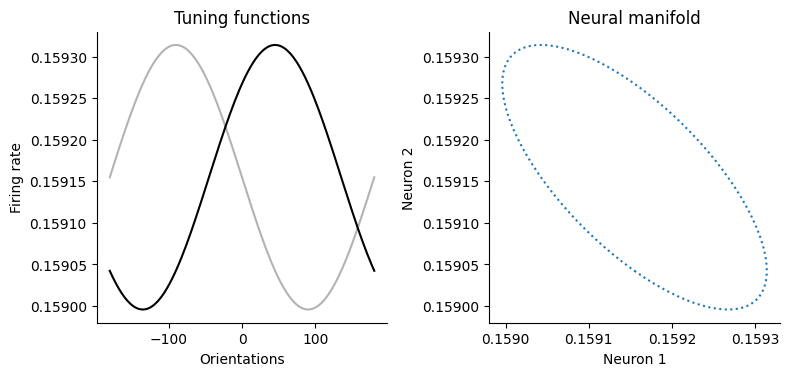

time: 723 ms (started: 2024-03-26 09:54:46 +00:00)


In [ ]:
# test an offset of 135 degrees

# neuron 1
parameters = {

    # neuron 1
    "n1_pref_orientation": -90,  # mean of the tuning function (concentration)
    "n1_strength": 0.001,        # width of the tuning function (concentration)

    # neuron 2
    "n2_pref_orientation": 45,
    "n2_strength": 0.001

}

plot_tuning_and_manifold(parameters)

**DO**: Test an offset of 170 degrees.

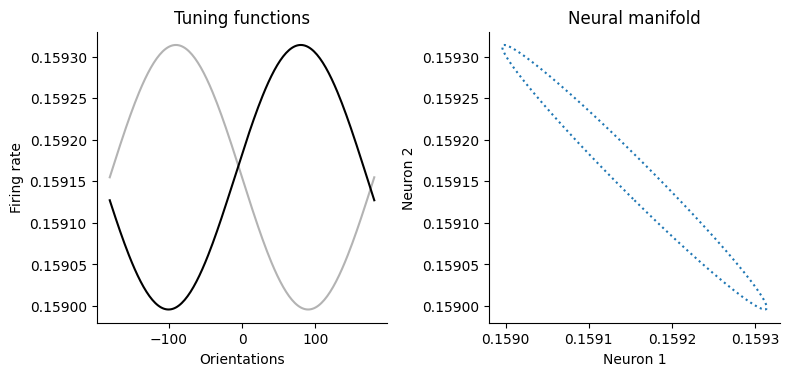

time: 512 ms (started: 2024-03-26 09:55:53 +00:00)


In [ ]:
# test an offset of 170 degrees

# neuron 1
parameters = {

    # neuron 1
    "n1_pref_orientation": -90,  # mean of the tuning function (concentration)
    "n1_strength": 0.001,        # width of the tuning function (concentration)

    # neuron 2
    "n2_pref_orientation": 80,
    "n2_strength": 0.001

}

plot_tuning_and_manifold(parameters)

# (1s) **Tuning shapes and manifold**

[TODO]: Increase the tuning strength (concentration parameters) of the tuning functions. Try the same strength for both neurons first.

[QUESTION]: How does the neural manifold change?

[ANSWER]: The neural manifold now takes a crescent-like shape.

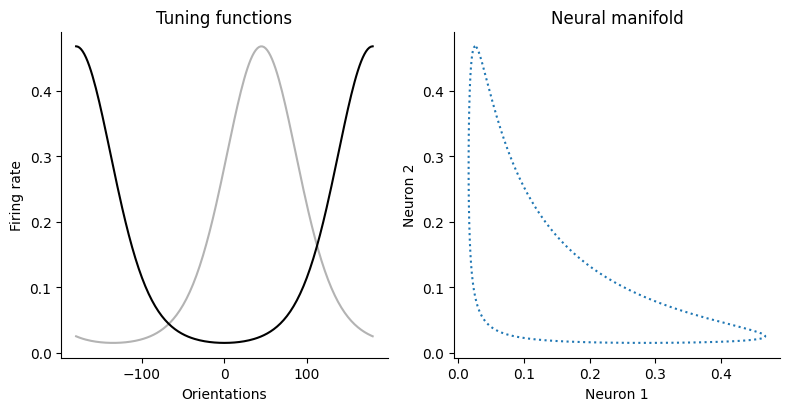

time: 695 ms (started: 2024-03-26 09:56:34 +00:00)


In [ ]:
# neuron 1
parameters = {

    # neuron 1
    "n1_pref_orientation": 45,
    "n1_strength": 1.7,

    # neuron 2
    "n2_pref_orientation": -180,
    "n2_strength": 1.7

}

plot_tuning_and_manifold(parameters)

# (1s) **When not a manifold**

* Latents can be `entangled`, which makes them very hard to interpret.

* Read Zhou, D., & Wei, X. X. (2020). Learning identifiable and interpretable latent models of high-dimensional neural activity using pi-VAE. Advances in Neural Information Processing Systems, 33, 7234-7247

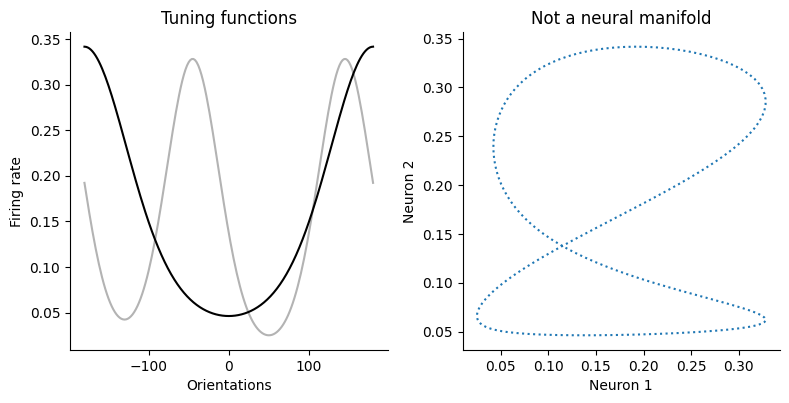

In [ ]:
# neuron 1
parameters = {

    # neuron 1
    "n1_pref_orientation_1": -45,
    "n1_strength_1": 3,
    "n1_pref_orientation_2": 145,
    "n1_strength_2": 3,
    "mixture": 0.5,

    # neuron 2
    "n2_pref_orientation": -180,
    "n2_strength": 1

}

plot_tuning_and_not_manifold(parameters)

# (1s) **Disentangling the hypersurface**

[TODO]: add a third neuron to the population. Explore its parameters.

[QUESTION]: Can you find a set of parameters that produces a continuous hyperplane (a neural manifold) in the three-neuron space?

[ANSWER]: Yes we recover a continuous hyperplane (a manifold) by adding to the set of parameters:
- "n3_pref_orientation": 150,
- "n3_strength": 0.9

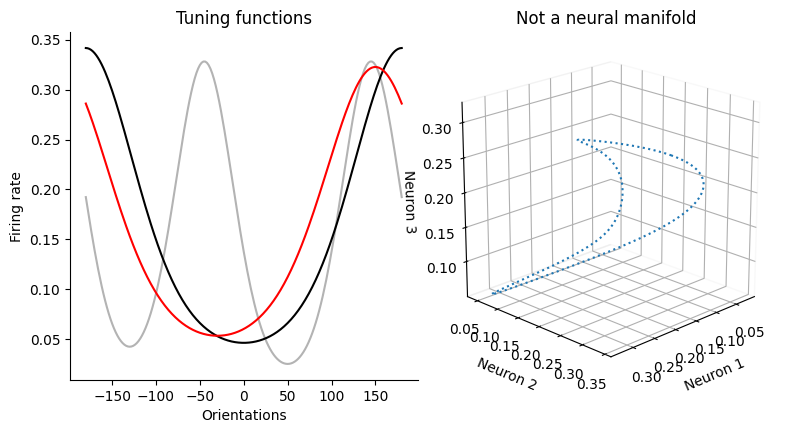

time: 845 ms (started: 2024-03-26 09:58:16 +00:00)


In [ ]:
# neuron 1
parameters = {

    # neuron 1
    "n1_pref_orientation_1": -45,
    "n1_strength_1": 3,
    "n1_pref_orientation_2": 145,
    "n1_strength_2": 3,
    "mixture": 0.5,

    # neuron 2
    "n2_pref_orientation": -180,
    "n2_strength": 1,

    # neuron 3
    "n3_pref_orientation": 150,
    "n3_strength": 0.9

}

plot_tuning_and_disentangled_hypersurface(parameters)

# (2s) **Tuning strengths and manifold**

## Case 1: weak tunings


[TODO]: Start with simulating this weak tuning

[QUESTION]: What type of neural code would that yield? Hint: would that code be equally sensitive to all types of orientation changes?

[ANSWER]: This would be a "lumper" code: a code more sensitive to global orientation changes than to local changes.

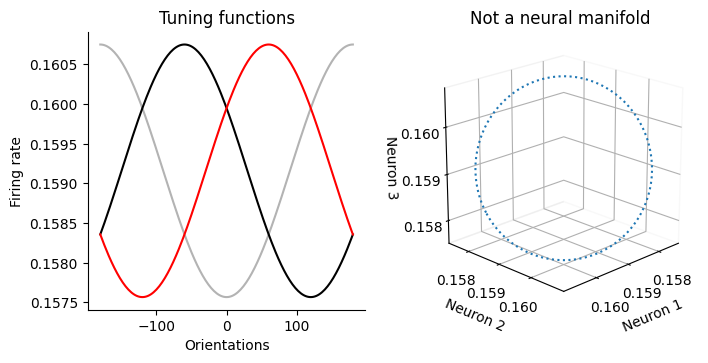

time: 700 ms (started: 2024-03-26 09:58:39 +00:00)


In [ ]:
# set parameters
parameters = {

    # neuron 1
    "n1_pref_orientation": -180,
    "n1_strength": 0.01,

    # neuron 2
    "n2_pref_orientation": -60,
    "n2_strength": 0.01,

    # neuron 3
    "n3_pref_orientation": 60,
    "n3_strength": 0.01

}

# simulate
plot_3_neurons_tunings_and_manifold(parameters)

## Case 2: Strong tunings

[TODO]: Simulate much stronger tunings (the same for all neurons first).

[QUESTION]: How does the neural manifold change? What type of neural code would that yield?


[ANSWER]: Narrower tuning curves lead to manifolds that are highly curved. That would yield a "splitter" code, i.e., a code equally sensitive to small and large orientation changes.

[IMPLICATIONS]: The neurons' tuning strengths condition the number of high-dimensional linear subspaces that are needed to explain most of the variance of the neural response manifold (See next notebook).

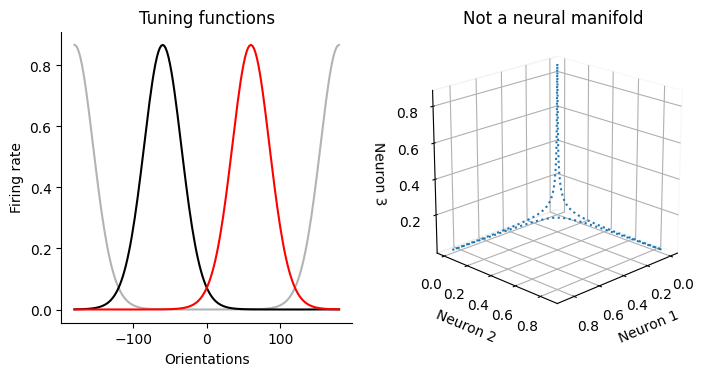

In [ ]:
# set parameters
parameters = {

    # neuron 1
    "n1_pref_orientation": -180,
    "n1_strength": 5,

    # neuron 2
    "n2_pref_orientation": -60,
    "n2_strength": 5,

    # neuron 3
    "n3_pref_orientation": 60,
    "n3_strength": 5

}

# simulate
plot_3_neurons_tunings_and_manifold(parameters)